# A* Algorithm 

# References

In [1]:
#I acknowledge that this work is my own, and I have used ChatGPT 4 (OpenAI, https://chat.openai.com/) to
#rectify few of my errors in the code and also in some places where I had doubts in the code that I have explicitly mentioned in the codes below.

In [2]:
# Codes Adapted from:

# 1. A* Algorithm -
#    © 2020 - Analytics Link, Applying the A* Path Finding Algorithm in Python (Part 1: 2D square grid) [computer program],
#    Available from: https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid
#                    https://pureai.substack.com/p/from-grid-to-goal-a-search-explained

# 2. A* Algorithm -
#    Christian Careaga (christian.careaga7@gmail.com), A* Pathfinding in Python (2.7) [computer program], Available from: https://code.activestate.com/recipes/578919-python-a-pathfinding-with-binary-heap/

# 3. Gaussian Mixture - 
#    StackOverflow, Available from: https://stackoverflow.com/questions/49106806/how-to-do-a-simple-gaussian-mixture-sampling-and-pdf-plotting-with-numpy-scipy


# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import itertools
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as patches
import scipy.stats as ss
import matplotlib.tri as tri
from scipy.sparse import csr_matrix

# A* Algorithm on Rectangular Grid

In [4]:
# A* Algorithm [1,2]
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]  # Return reversed path to include start point
        
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            if 0 <= neighbor[0] < array.shape[0] and 0 <= neighbor[1] < array.shape[1] :
                tentative_g_score = gscore[current] + heuristic(current, neighbor)
                if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                    continue
                if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                    came_from[neighbor] = current
                    gscore[neighbor] = tentative_g_score
                    fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(oheap, (fscore[neighbor], neighbor))
    return False

# Define start and end points
start_point = (0, 0) 
end_point = (3, 4)

# Create a 4x5 grid where 0 represents passable terrain
grid = np.zeros((4, 5))

# Run A* algorithm
path = astar(grid, start_point, end_point)


path


[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

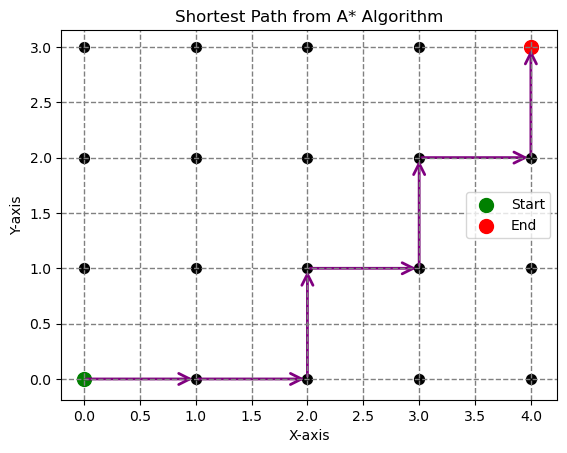

In [5]:
# Plot the grid
plt.grid(True, color='grey', linestyle='--', linewidth=1)
plt.title("Shortest Path from A* Algorithm")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")


# Define the grid dimensions for a 4x5 grid
rows, columns = 4, 5

# Generate each point on the grid - (x,y)
grid = list(itertools.product(range(rows), range(columns)))

# Define the start and end points as grid coordinates
start_point = (0, 0)  
end_point = (3, 4)  

# Plot the vertices
for vertex in grid:
    plt.scatter(vertex[1], vertex[0], color='black', s=50)  

# Plot the start and end points
plt.scatter(start_point[1], start_point[0], color='green', s=100, label='Start')  
plt.scatter(end_point[1], end_point[0], color='red', s=100, label='End') 

# Extract x and y coordinates from the path list for plotting
if path:  # Check if path is not empty
  for i in range(len(path)-1):
        start = path[i]
        end = path[i+1]
        # Calculate the positions for the arrow patch
        dx = end[1] - start[1]
        dy = end[0] - start[0]
        arrow = FancyArrowPatch((start[1], start[0]), (end[1], end[0]), arrowstyle='->', mutation_scale=20, color='purple', linewidth=2)
        plt.gca().add_patch(arrow)


plt.legend()
plt.grid(True, color='grey', linestyle='--', linewidth=1)
plt.show()


In [6]:
# Calculating the total cost of the final path chosen by the algorithm
path_length = len(path)

path_length

8

#  A* Algorithm on Rectangular Grid with Vertex and Edge Costs

In [7]:
def heuristic(a, b):
    """Calculate the heuristic for A*."""
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def coord_to_index(coord, columns):
    return coord[0] * columns + coord[1]

def astar_with_costs(array, start, goal, b, B, rows, columns):
    """A* algorithm that considers both vertex and edge costs."""
    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]  # Return reversed path to include start point
        
        close_set.add(current)
        
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current]  # Base gscore
            
            # Check if neighbor is within the grid 
            if 0 <= neighbor[0] < array.shape[0] and 0 <= neighbor[1] < array.shape[1] and array[neighbor[0], neighbor[1]] != 1:
                neighbor_index = coord_to_index(neighbor, columns)
                current_index = coord_to_index(current, columns)
                
                # Calculate tentative gscore including vertex and edge costs
                tentative_g_score += heuristic(current, neighbor) + b[neighbor_index]
                if B[current_index, neighbor_index] != 0:
                    tentative_g_score += B[current_index, neighbor_index]
                
                if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, float('inf')):
                    continue
                
                if tentative_g_score < gscore.get(neighbor, float('inf')) or neighbor not in [i[1] for i in oheap]:
                    came_from[neighbor] = current
                    gscore[neighbor] = tentative_g_score
                    fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(oheap, (fscore[neighbor], neighbor))
                    
    return False  # If no path is found

# Sample setup for demonstration
rows, columns = 4, 5
N = rows * columns

def state_index(state, rows, columns):
    return state[0] * columns + state[1]

costs = np.zeros(N)
costs[state_index(end_point, rows, columns)] = 0
b = np.exp(-costs)  # Convert costs to probabilities
                    
# Initialize the edge cost matrix B with high values for all transitions
B =  np.zeros((N, N))

# Populate the edge cost matrix B for direct neighbors
for i in range(rows):
    for j in range(columns):
        current_state = (i, j)
        current_index = state_index(current_state, rows, columns)
        if current_state == end_point:
            B[current_index, current_index] = 1
        else:
            # Get the list of neighboring states (up, down, left, right)
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            # Filter out neighbors that are outside the grid
            valid_neighbors = [n for n in neighbors if 0 <= n[0] < rows and 0 <= n[1] < columns]
            
            if valid_neighbors:
                for neighbor in valid_neighbors:
                    neighbor_index = state_index(neighbor, rows, columns)
                    B[current_index, neighbor_index] = np.exp(-1.0)
                    

# Modify vertex and edge costs as per requirements
specific_vertices = {(0,2), (2, 2)}
for vertex in specific_vertices:
    index = state_index(vertex, rows, columns)
    b[index] = np.exp(-1) 

# Modify costs for specific edges 
high_cost_edge = ((1, 1), (2, 1))  # Example edge with high cost
low_cost_edge = ((1, 2), (1, 3))   # Example edge with low cost

B[state_index(high_cost_edge[0], rows, columns), state_index(high_cost_edge[1], rows, columns)] = np.exp(-0.5) 
B[state_index(low_cost_edge[0], rows, columns), state_index(low_cost_edge[1], rows, columns)] = np.exp(-5.0) 

# Grid where 0 represents passable terrain and 1 represents impassable
grid = np.zeros((4, 5))

start_point = (0, 0)
end_point = (3, 4)

# Run A* with costs
path = astar_with_costs(grid, start_point, end_point, b, B, rows, columns)

print("Path from start to goal:", path)


Path from start to goal: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4)]


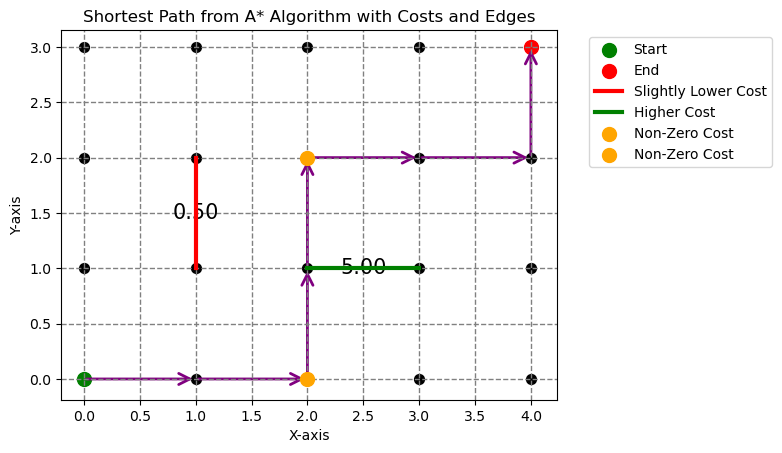

In [8]:
plt.grid(True, color='grey', linestyle='--', linewidth=1)
plt.title("Shortest Path from A* Algorithm with Costs and Edges")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

start_point = (0, 0)
end_point = (3, 4) 

# Dimensions for the grid
rows = 4  # Number of rows
columns = 5  # Number of columns

grid_size = rows * columns

# Generate each point on the grid - (x,y)
grid = list(itertools.product(range(rows), range(columns)))
plt.grid(True, color='grey', linestyle='--', linewidth=1)

# Plot the vertices
for vertex in grid:
    plt.scatter(vertex[1], vertex[0], color='black', s=50) 

# Plot the start and end points
plt.scatter(start_point[1], start_point[0], color='green', s=100, label='Start')  
plt.scatter(end_point[1], end_point[0], color='red', s=100, label='End')

# Convert state index to grid coordinates for a 4x5 grid
def state_to_coord(state, rows, columns):
    return (state % columns, state // columns)

# Convert grid coordinates to state index for a 4x5 grid
def coord_to_state(coord, rows, columns):
    return coord[1] * columns + coord[0]

# Function to get the index of a state in the grid
def state_index(state, rows, columns):
    return state[0] * columns + state[1]

# Highlight specific edges with costs
# Plot specific edges with different color or width
high_cost_coords = [state_to_coord(state_index(high_cost_edge[0], rows, columns), rows, columns),
                    state_to_coord(state_index(high_cost_edge[1], rows, columns), rows, columns)]

low_cost_coords = [state_to_coord(state_index(low_cost_edge[0], rows, columns), rows, columns),
                   state_to_coord(state_index(low_cost_edge[1], rows, columns), rows, columns)]


# Draw the high cost edge with a label
# In terms of probability exp(-0.5) is higher than exp(-5.0) but in terms of log 5.0 > 0.5 
# High cost in terms of log
high_cost_start_coord = state_to_coord(state_index(high_cost_edge[0], rows, columns), rows, columns)
high_cost_end_coord = state_to_coord(state_index(high_cost_edge[1], rows, columns), rows, columns)

plt.plot(*zip(*high_cost_coords), color='red', linewidth=3, zorder=4, label='Slightly Lower Cost')
# 0.60653065971 - exp(-0.5)
# Calculate the midpoint for the label
midpoint_high_cost = ((high_cost_start_coord[0] + high_cost_end_coord[0]) / 2,
                      (high_cost_start_coord[1] + high_cost_end_coord[1]) / 2)
plt.text(midpoint_high_cost[0], midpoint_high_cost[1], '0.50', fontsize=15,
         ha='center', va='center', color='black')

# Draw the low cost edge with a label
# 0.00673794699 - exp(-5.0)
low_cost_start_coord = state_to_coord(state_index(low_cost_edge[0], rows, columns), rows, columns)
low_cost_end_coord = state_to_coord(state_index(low_cost_edge[1], rows, columns), rows, columns)

plt.plot(*zip(*low_cost_coords), color='green', linewidth=3, zorder=4, label='Higher Cost')
# Calculate the midpoint for the label
midpoint_low_cost = ((low_cost_start_coord[0] + low_cost_end_coord[0]) / 2,
                     (low_cost_start_coord[1] + low_cost_end_coord[1]) / 2)
plt.text(midpoint_low_cost[0], midpoint_low_cost[1],  "5.00", fontsize=15,
         ha='center', va='center', color='black')

# Plot specific vertices with different color or size
for vertex in specific_vertices:
    plt.scatter(vertex[1], vertex[0], color='Orange', s=100, zorder=5, label='Non-Zero Cost')
    
# Plot the path using arrows
if path:
    for i in range(len(path)-1):
        start = path[i]
        end = path[i+1]
        arrow = FancyArrowPatch((start[1], start[0]), (end[1], end[0]), arrowstyle='->', mutation_scale=20, color='purple', linewidth=2)
        plt.gca().add_patch(arrow)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Total Costs Obtained

In [9]:
log_b = -np.log(b)
log_B = -np.log(B, where=(B > 0), out=np.full(B.shape, np.inf)) 

In [10]:
# Convert path coordinates to indices for accessing b and B
path_indices = [coord_to_index(vertex, columns) for vertex in path]

# Calculate the vertex costs for the current path
total_vertex_cost = sum(log_b[path_indices[i]] for i in range(len(path)))

# Calculate the edge costs for the current path
total_edge_cost = sum(log_B[path_indices[i], path_indices[i+1]] for i in range(len(path)-1))

# Combine the edge and vertex costs for the total cost
total_cost = total_vertex_cost + total_edge_cost

# Print out the costs for the path
print(f"Path Length = {len(path)-1}, Total Cost = {total_cost:.2f}, Vertex Cost = {total_vertex_cost:.2f}, Edge Cost = {total_edge_cost:.2f}")

Path Length = 7, Total Cost = 9.00, Vertex Cost = 2.00, Edge Cost = 7.00


# A* Algorithm on Hexagonal Grid with Vertex and Edge Costs

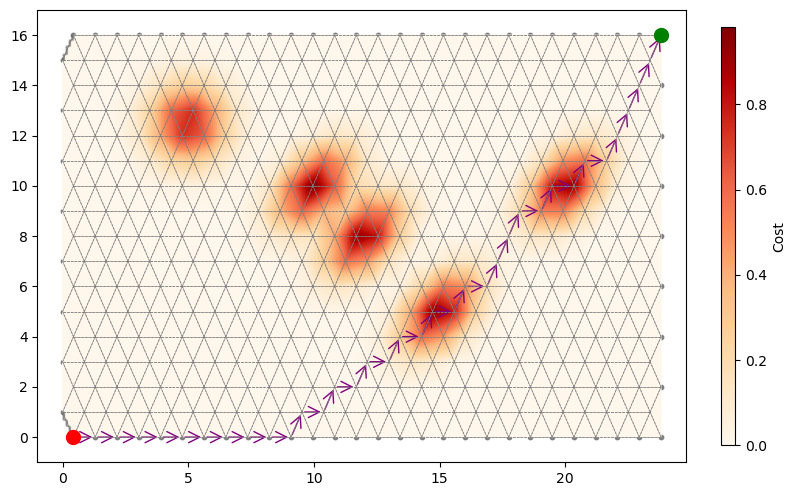

In [11]:
# Hexagonal grid parameters

fig_width = 9
fig_height = 9
ratio = np.sqrt(3) / 2  # cos(60°)
N_X = int(25 / ratio)  # Number of hexagons along x-axis
N_Y = int(15 / ratio)  # Number of hexagons along y-axis

# Generate hexagonal grid coordinates
xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
xv = xv * ratio
xv[::2, :] += ratio / 2  # Offset for even rows

# Total number of states in the grid
N = N_X * N_Y  

start_point = (0, 0) 
end_point =  (N_X - 1 , N_Y - 1)

# Convert (x, y) to state index
def xy_to_state(x, y, N_X):
    return y * N_X + x
    
def state_to_xy(index, N_X):
    x = index % N_X
    y = index // N_X
    return x, y

def state_to_xy_hex(index, N_X, N_Y, xv, yv):
    x, y = state_to_xy(index, N_X)
    return  xv[y, x], yv[y, x]
    
# Convert start and end points to indices
start_state_index = xy_to_state(*start_point, N_X)
end_state_index = xy_to_state(*end_point, N_X)

def hex_neighbors(point, N_X, N_Y):
    x, y = point
    # Determine neighbors based on even or odd row
    if y % 2 == 0:
        neighbor_dirs = [[+1,  0], [+1, -1], [ 0, -1], [-1,  0], [ 0, +1], [+1, +1]]
    else:
        neighbor_dirs = [[+1,  0], [ 0, -1], [-1, -1], [-1,  0], [-1, +1], [ 0, +1]]
    
    neighbors = []
    for dx, dy in neighbor_dirs:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N_X and 0 <= ny < N_Y:
            neighbors.append((nx, ny))
    return neighbors
    
components = [
    ((5, 12.5), np.array([[1, 0], [0, 1]])),  # Gaussian centered at (5,5)
    ((10, 10), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (10,10)
    ((15, 5), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (15,5)
    ((12, 8), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (12,8)
    ((20, 10), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (20,10)
]

# Simulate vertex costs using a mixture of Gaussians - [3] and asked GPT 
def mixture_of_gaussians(xv, yv, components):
    costs = np.zeros(xv.shape)
    for (mu, sigma) in components:
        # Create a meshgrid of coordinates for the Gaussian function
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
        mvn = ss.multivariate_normal(mean=mu, cov=sigma)
        for i in range(xv.shape[0]):
            for j in range(xv.shape[1]):
                costs[i, j] += mvn.pdf((xv[i, j], yv[i, j]))
    # Normalize the costs to a specific range if needed, e.g., [0, 1]
    costs = (costs - np.min(costs)) / (np.max(costs) - np.min(costs))
    return costs

# Generate costs for each vertex using the mixture of Gaussians
vertex_costs = mixture_of_gaussians(xv, yv, components)

# Initialize the costs vector with the generated vertex costs
costs = np.zeros(N)  # Reset costs to zero before applying vertex costs
for y in range(N_Y):
    for x in range(N_X):
        index = xy_to_state(x, y, N_X)
        costs[index] = vertex_costs[y, x]

# Set the cost of the end point to zero to represent the goal state
costs[xy_to_state(*end_point, N_X)] = 0
b = np.exp(-costs)

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Initialize the transition cost matrix with zeros
B = np.zeros((N, N))

for y in range(N_Y):
    for x in range(N_X):
        current_state = xy_to_state(x, y, N_X)
        current_x, current_y = xv[y, x], yv[y, x]  # Get the actual perturbed positions
        if current_state == end_state_index:  
            B[current_state, current_state] = 1  # Optional: handling for the end point
        else:
            neighbors = hex_neighbors((x, y), N_X, N_Y)
            for neighbor in neighbors:
                neighbor_index = xy_to_state(*neighbor, N_X)
                neighbor_x, neighbor_y = xv[neighbor[1], neighbor[0]], yv[neighbor[1], neighbor[0]]
                # Calculate the Euclidean distance between the current hex and its neighbor
                distance = euclidean_distance(current_x, current_y, neighbor_x, neighbor_y)
                B[current_state, neighbor_index] = np.exp(-distance)  # Set the cost based on the distance

def hex_heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)


def astar_hex_grid(N_X, N_Y, start, goal, b, B):
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: hex_heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = [goal]  # Start with the goal in the path
            while current in came_from:
                current = came_from[current]
                data.append(current)
            data.reverse()
            return data
        
        close_set.add(current)
        for neighbor in hex_neighbors(current, N_X, N_Y):
            tentative_g_score = gscore[current] + B[xy_to_state(*current, N_X), xy_to_state(*neighbor, N_X)]
            
            # Add vertex cost for the neighbor
            tentative_g_score += b[xy_to_state(*neighbor, N_X)]
            
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, float('inf')):
                continue
            
            if tentative_g_score < gscore.get(neighbor, float('inf')) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + hex_heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                    
    return False  # If no path is found

# Run the updated A* with costs
path_hex_with_costs = astar_hex_grid(N_X, N_Y, start_point, end_point, b, B)


# Visualization code with corrected dashed lines
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_aspect('equal')

# Plot the points of the hex grid
ax.scatter(xv, yv, s=10, c='grey')

# Visualize transitions
for y in range(N_Y):
    for x in range(N_X):
        current_index = xy_to_state(x, y, N_X)
        cx, cy = xv[y, x], yv[y, x]
        for neighbor in hex_neighbors((x, y), N_X, N_Y):
            nx, ny = neighbor
            ax.plot([cx, xv[ny, nx]], [cy, yv[ny, nx]], color='grey', linestyle='--', linewidth=0.5)


# Convert the hexagonal grid matrix to triangular grid points for pcolormesh - asked GPT
triang = tri.Triangulation(xv.ravel(), yv.ravel())

# Interpolate the vertex costs for the smooth heatmap
interpolator = tri.LinearTriInterpolator(triang, vertex_costs.ravel())
Xi, Yi = np.meshgrid(np.linspace(xv.min(), xv.max(), 200), np.linspace(yv.min(), yv.max(), 200))
zi = interpolator(Xi, Yi)

# Create the smooth heatmap
heatmap = ax.pcolormesh(Xi, Yi, zi, shading='gouraud', cmap=plt.cm.OrRd)

# Set the axis limits to the min and max of your grid coordinates
margin = 1
ax.set_xlim([xv.min() - margin, xv.max() + margin])
ax.set_ylim([yv.min() - margin, yv.max() + margin])

# Add a color bar for reference
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical',aspect=30, fraction=0.02)
cbar.ax.set_ylabel('Cost')

# Visualize the path found by A*
if path_hex_with_costs:
    for i in range(len(path_hex_with_costs)-1):
        start = path_hex_with_costs[i]
        end = path_hex_with_costs[i+1]
        start_coord = state_to_xy_hex(xy_to_state(start[0], start[1], N_X), N_X, N_Y, xv, yv)
        end_coord = state_to_xy_hex(xy_to_state(end[0], end[1], N_X), N_X, N_Y, xv, yv)
        arrow = FancyArrowPatch(start_coord, end_coord, arrowstyle='->', mutation_scale=20, color='purple', linewidth=1)
        ax.add_patch(arrow)
        
# Define start and end points for visualization
start_x, start_y = state_to_xy_hex(start_state_index, N_X, N_Y, xv, yv)
end_x, end_y = state_to_xy_hex(end_state_index, N_X, N_Y, xv, yv)
ax.scatter(start_x, start_y, s=100, c='red', zorder=5)  # Start point
ax.scatter(end_x, end_y, s=100, c='green', zorder=5)  # End point


plt.show()

# Total Costs Obtained

In [12]:
total_cost = 0
vertex_cost = 0
edge_cost = 0

log_b = -np.log(b)
log_B = -np.log(B, where=(B > 0), out=np.full(B.shape, np.inf)) 

# Ensure path_hex_random contains state indices
path_indices = [xy_to_state(*point, N_X) for point in path_hex_with_costs]

# Calculate the total edge and vertex costs for the path
for i in range(len(path_indices)-1):
    start_index = path_indices[i]
    end_index = path_indices[i + 1]
    
    # Calculate edge cost
    edge_cost += log_B[start_index, end_index]  # Assuming edge_costs is correctly populated
    
    # Add vertex cost for the end vertex (or start vertex depending on your convention)
    vertex_cost += log_b[end_index]

# Total cost is the sum of edge and vertex costs
total_cost = edge_cost + vertex_cost

print(f"Path Length = {len(path_indices)}, Total Cost = {total_cost}, Vertex Cost = {vertex_cost}, Edge Cost = {edge_cost}")


Path Length = 36, Total Cost = 40.739430911864815, Vertex Cost = 6.849352465797788, Edge Cost = 33.89007844606703


# A* Algorithm on Randomly Pertubed Hexagonal Grid with Vertex and Edge Costs

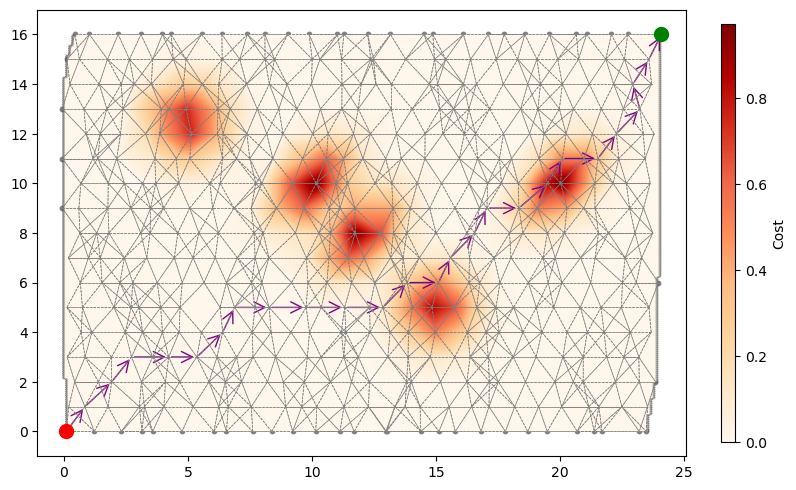

In [6]:
# Hexagonal grid parameters

fig_width = 9
fig_height = 9
ratio = np.sqrt(3) / 2  # cos(60°)
N_X = int(25 / ratio)  # Number of hexagons along x-axis
N_Y = int(15 / ratio)  # Number of hexagons along y-axis

# Generate hexagonal grid coordinates
xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
xv = xv * ratio
xv[::2, :] += ratio / 2  # Offset for even rows

# Add random perturbations
perturbations = np.random.normal(loc=0, scale=0.2, size=(N_Y, N_X))  # Corrected dimensions
xv += perturbations

# Total number of states in the grid
N = N_X * N_Y  

start_point = (0, 0) 
end_point =  (N_X - 1 , N_Y - 1)

# Convert (x, y) to state index
def xy_to_state(x, y, N_X):
    return y * N_X + x
    
def state_to_xy(index, N_X):
    x = index % N_X
    y = index // N_X
    return x, y

def state_to_xy_hex(index, N_X, N_Y, xv, yv):
    x, y = state_to_xy(index, N_X)
    return  xv[y, x], yv[y, x]
    
# Convert start and end points to indices
start_state_index = xy_to_state(*start_point, N_X)
end_state_index = xy_to_state(*end_point, N_X)

def hex_neighbors(x, y, N_X, N_Y, xv, yv, connectivity_radius=1.55):
    neighbors = []
    current_x, current_y = xv[y, x], yv[y, x]  
    for ny in range(N_Y):
        for nx in range(N_X):
            if nx == x and ny == y:  # Skip the current cell
                continue
            neighbor_x, neighbor_y = xv[ny, nx], yv[ny, nx] 
            distance = euclidean_distance(current_x, current_y, neighbor_x, neighbor_y)
            if distance <= connectivity_radius:
                neighbors.append((nx, ny))
    return neighbors
    
components = [
    ((5, 12.5), np.array([[1, 0], [0, 1]])),  # Gaussian centered at (5,5)
    ((10, 10), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (10,10)
    ((15, 5), np.array([[1, 0], [0, 1]])),  # Gaussian centered at (15,5)
    ((12, 8), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (12,8)
    ((20, 10), np.array([[1, 0.5], [0.5, 1]])),  # Gaussian centered at (20,10)
]

# Simulate vertex costs using a mixture of Gaussians - [3] and asked GPT
def mixture_of_gaussians(xv, yv, components):
    costs = np.zeros(xv.shape)
    for (mu, sigma) in components:
        # Create a meshgrid of coordinates for the Gaussian function
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
        mvn = ss.multivariate_normal(mean=mu, cov=sigma)
        for i in range(xv.shape[0]):
            for j in range(xv.shape[1]):
                costs[i, j] += mvn.pdf((xv[i, j], yv[i, j]))
    # Normalize the costs to a specific range if needed, e.g., [0, 1]
    costs = (costs - np.min(costs)) / (np.max(costs) - np.min(costs))
    return costs

# Generate costs for each vertex using the mixture of Gaussians
vertex_costs = mixture_of_gaussians(xv, yv, components)

# Initialize the costs vector with the generated vertex costs
costs = np.zeros(N)  # Reset costs to zero before applying vertex costs
for y in range(N_Y):
    for x in range(N_X):
        index = xy_to_state(x, y, N_X)
        costs[index] = vertex_costs[y, x]

# Set the cost of the end point to zero to represent the goal state
costs[xy_to_state(*end_point, N_X)] = 0
# Convert costs to probabilities 
b = np.exp(-costs) 

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Initialize the transition cost matrix with zeros
B = np.zeros((N, N))

for y in range(N_Y):
    for x in range(N_X):
        current_state = xy_to_state(x, y, N_X)
        current_x, current_y = xv[y, x], yv[y, x]  # Get the actual perturbed positions
        if current_state == end_state_index:  
            B[current_state, current_state] = 1 
        else:
            neighbors = hex_neighbors(x, y, N_X, N_Y,xv, yv)
            for neighbor in neighbors:
                neighbor_index = xy_to_state(*neighbor, N_X)
                neighbor_x, neighbor_y = xv[neighbor[1], neighbor[0]], yv[neighbor[1], neighbor[0]]  # Get the perturbed positions of the neighbor
                # Calculate the Euclidean distance between the current hex and its neighbor
                distance = euclidean_distance(current_x, current_y, neighbor_x, neighbor_y)
                B[current_state, neighbor_index] = np.exp(-distance)  # Set the cost based on the distance


def hex_heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)


def astar_hex_random_grid(N_X, N_Y, start, goal, b, B, xv, yv):
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: hex_heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = [goal]  # Start with the goal in the path
            while current in came_from:
                current = came_from[current]
                data.append(current)
            data.reverse()
            return data
        
        close_set.add(current)
        for neighbor in hex_neighbors(*current, N_X, N_Y, xv, yv):
            tentative_g_score = gscore[current] + B[xy_to_state(*current, N_X), xy_to_state(*neighbor, N_X)]
            
            # Add vertex cost for the neighbor
            tentative_g_score += b[xy_to_state(*neighbor, N_X)]
            
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, float('inf')):
                continue
            
            if tentative_g_score < gscore.get(neighbor, float('inf')) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + hex_heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                    
    return False  # If no path is found


# Run the updated A* with costs
path_hex_random = astar_hex_random_grid(N_X, N_Y, start_point, end_point, b, B, xv, yv)



# Visualization code with corrected dashed lines
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_aspect('equal')

# Plot the points of the hex grid
ax.scatter(xv, yv, s=10, c='grey')

# Visualize transitions
for y in range(N_Y):
    for x in range(N_X):
        current_index = xy_to_state(x, y, N_X)
        cx, cy = xv[y, x], yv[y, x]
        for neighbor in hex_neighbors(x, y, N_X, N_Y,xv,yv):
            nx, ny = neighbor
            ax.plot([cx, xv[ny, nx]], [cy, yv[ny, nx]], color='grey', linestyle='--', linewidth=0.5)


# Convert the hexagonal grid matrix to triangular grid points for pcolormesh - asked GPT
triang = tri.Triangulation(xv.ravel(), yv.ravel())

# Interpolate the vertex costs for the smooth heatmap
interpolator = tri.LinearTriInterpolator(triang, vertex_costs.ravel())
Xi, Yi = np.meshgrid(np.linspace(xv.min(), xv.max(), 200), np.linspace(yv.min(), yv.max(), 200))
zi = interpolator(Xi, Yi)

# Create the smooth heatmap
heatmap = ax.pcolormesh(Xi, Yi, zi, shading='gouraud', cmap=plt.cm.OrRd)

# Set the axis limits to the min and max of your grid coordinates
margin = 1
ax.set_xlim([xv.min() - margin, xv.max() + margin])
ax.set_ylim([yv.min() - margin, yv.max() + margin])

# Add a color bar for reference
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical',aspect=30, fraction=0.02)
cbar.ax.set_ylabel('Cost')

# Visualize the path found by A*
if path_hex_random:
    for i in range(len(path_hex_random)-1):
        start = path_hex_random[i]
        end = path_hex_random[i+1]
        start_coord = state_to_xy_hex(xy_to_state(start[0], start[1], N_X), N_X, N_Y, xv, yv)
        end_coord = state_to_xy_hex(xy_to_state(end[0], end[1], N_X), N_X, N_Y, xv, yv)
        arrow = FancyArrowPatch(start_coord, end_coord, arrowstyle='->', mutation_scale=20, color='purple', linewidth=1)
        ax.add_patch(arrow)
        
# Define start and end points for visualization
start_x, start_y = state_to_xy_hex(start_state_index, N_X, N_Y, xv, yv)
end_x, end_y = state_to_xy_hex(end_state_index, N_X, N_Y, xv, yv)
ax.scatter(start_x, start_y, s=100, c='red', zorder=5)  # Start point
ax.scatter(end_x, end_y, s=100, c='green', zorder=5)  # End point


plt.show()

# Total Costs Obtained

In [7]:
total_cost = 0
vertex_cost = 0
edge_cost = 0

log_b = -np.log(b)
log_B = -np.log(B, where=(B > 0), out=np.full(B.shape, np.inf)) 

# Ensure path_hex_random contains state indices
path_indices = [xy_to_state(*point, N_X) for point in path_hex_random]

# Calculate the total edge and vertex costs for the path
for i in range(len(path_indices)-1):
    start_index = path_indices[i]
    end_index = path_indices[i + 1]
    
    # Calculate edge cost
    edge_cost += log_B[start_index, end_index]  # Assuming edge_costs is correctly populated
    
    # Add vertex cost for the end vertex (or start vertex depending on your convention)
    vertex_cost += log_b[end_index]

# Total cost is the sum of edge and vertex costs
total_cost = edge_cost + vertex_cost

print(f"Path Length = {len(path_indices)}, Total Cost = {total_cost}, Vertex Cost = {vertex_cost}, Edge Cost = {edge_cost}")


Path Length = 26, Total Cost = 35.818731725518035, Vertex Cost = 2.983159103887993, Edge Cost = 32.83557262163004
